<p style="background-color:orange;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">CROP PREDICTION ANALYSIS</p>

In [1]:
# ![CropUrl](https://media4.giphy.com/media/xUPGcuomRFMUcsB9nO/giphy.gif "Crops")

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">EXPLORATORY DATA ANALYSIS</p>

<b><i>Importing Required Libraries<i></b>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import pickle

<b><i>Loading the Dataset<i></b>

In [3]:
df = pd.read_csv(r"C:\\PYTHON\\Deployment\\Cropprediction\\Crop_recommendation.csv")

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<b><i>Understanding the Data<i></b>

__Nitrogen__

Nitrogen is primarily responsible for vegetative growth. Nitrogen assimilation into amino acids is the building block for protein in the plant. It is a component of chlorophyll and is required for several enzyme reactions.

__Phosphorus__

Phosphorus is a major component in plant DNA and RNA. Phosphorus is also critical in root development, crop maturity and seed production.

__Potassium__

The role of potassium in the plant is indirect, meaning that it does not make up any plant part. Potassium is required for the activation of over 80 enzymes throughout the plant. It's important for a plant's ability to withstand extreme cold and hot temperatures, drought and pests. Potassium increases water use efficiency and transforms sugars to starch in the grain-filling process.

__Temperature__

Temperature influences most plant processes, including photosynthesis, transpiration, respiration, germination and flowering. As temperature increases (up to a point), photosynthesis, transpiration and respiration increase. When combined with day length, temperature also affects the change from vegetative (leafy) to reproductive (flowering) growth. Depending on the situation and the specific plant, the effect of temperature can either speed up or slow down this transition.

__Role of Humidity in Plant Growth__

Plants are always adjusting their leaf stomatal openings based on the VPD and the humidity in the air. As seen above, high humidity is a problem because water usage by the plant is too slow and compromises quality, even though the stomates are constantly open. Likewise, if humidity is very low and subsequent transpiration is too high, the plant closes its stomatal openings to minimize water loss and wilting. Unfortunately, this also means photosynthesis is slowed and subsequently, so is plant growth.

As alluded to above, the two major functions of the plant that tie in closely with the humidity in the air and affect crop performance are transpiration and photosynthesis.

__Importance of Soil pH__

Garden soils are often described as acidic (sour) or alkaline (sweet). Unfortunately, the meanings of these terms and their relationship to plant growth are not clearly understood by some gardeners. The relative acidity or alkalinity of soil is indicated by its pH. The pH scale runs from 0 to 14. Any pH reading below 7 is acidic and any pH above 7 is alkaline. A pH of 7 indicates a neutral soil. The pH is important because it influences the availability of essential nutrients. Most horticultural crops will grow satisfactorily in soils having a pH between 6 (slightly acid) and 7.5 (slightly alkaline). Since most garden soils in Iowa are in this range, most gardeners experience few problems with soil pH.

There are a few plants that require a soil pH of 4.5 to 5.5. These "acid-loving" plants include azaleas, rhododendrons, and blueberries. The soil pH for these plants can be lowered by incorporating elemental sulfur (S) into the soil. Since the soil acidifying response to elemental sulfur is slow, it should be applied and incorporated a year before planting. Working Canadian sphagnum peat into the soil is another method to lower pH.

For most plants, however, a soil pH below 6.0 is undesirable. Strongly acid soils need to be limed to raise the pH to near neutral levels. Liming materials include ground limestone which is mainly calcium carbonate (CaCO3) and dolomitic limestone which contains CaCO3 and some magnesium carbonate (MgCO3). Since most Iowa soils do not need to be limed, apply liming materials only when recommended by a soil test.

A highly visible example of the role of soil pH in the availability of nutrients can often be seen in pin oaks. Many pin oaks in the Midwest suffer from iron chlorosis which is characterized by yellowish green foliage. The yellowing of the leaves is caused by a deficiency of iron within the plant. Most Iowa soils contain sufficient quantities of iron for good plant growth and leaf coloration. Unfortunately, much of the iron is in an insoluble form and is unavailable to pin oaks when the soil pH is above 7.0. Iron is readily available to pin oaks at a pH range of 5 to 6.5. Since efforts to correct iron chlorosis are extremely difficult, gardeners should avoid planting pin oaks in alkaline soils.

__Effects of Rain Water on Plants__

All water contains minerals, but the types and concentrations may vary with the source. Some minerals, which are also referred to as essential nutrients, are necessary for healthy plant growth and for the production of flowers and fruits.

Rainwater that falls to the ground usually filters slowly into the soil, where it will absorb ionized forms of essential plant nutrients like calcium and magnesium. Plants take up these minerals with water that is pulled up through roots, and these essential nutrients are distributed throughout the stems and leaves of plants through vascular tissue.


__Data Information__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Data Stats**

In [6]:
df.describe().T.style.set_properties(**{'background-color': 'pink','color': 'black','border-color': 'black'})

,count,mean,std,min,25%,50%,75%,max
N,2200.000000,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.000000,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.000000,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.000000,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.000000,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.000000,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.000000,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


__Let's Look into Feature "Labele"__

In [7]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

__Visualising Feature Label__

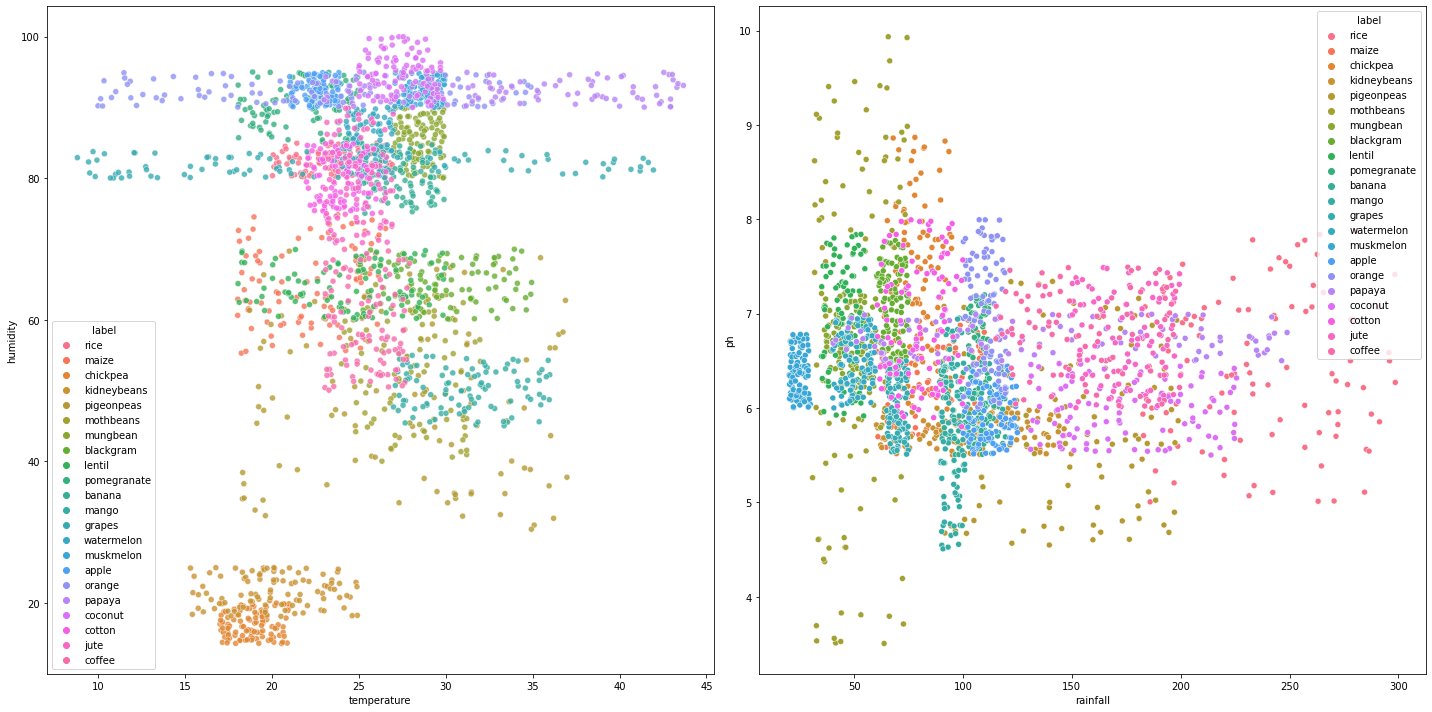

In [8]:
f, axs = plt.subplots(1, 2, figsize=(20,10), gridspec_kw=dict(width_ratios=[6, 6]))
sns.scatterplot(data=df, x="temperature", y="humidity", hue="label",alpha=.8, ax=axs[0])
sns.scatterplot(data=df, x="rainfall", y="ph", hue="label", alpha=1, ax=axs[1])
f.tight_layout()

**Checking For Missing Values**

In [9]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Feature Selection</p>

In [10]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state = None)

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Modelling Randomforest Algorithm</p>

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
regressor = RandomForestClassifier()

In [14]:
regressor.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
y_pred

array(['blackgram', 'mango', 'jute', 'coffee', 'muskmelon', 'mothbeans',
       'cotton', 'orange', 'coffee', 'watermelon', 'coconut', 'grapes',
       'kidneybeans', 'coconut', 'muskmelon', 'mothbeans', 'maize',
       'pigeonpeas', 'lentil', 'lentil', 'grapes', 'blackgram', 'apple',
       'cotton', 'chickpea', 'coffee', 'cotton', 'pomegranate', 'jute',
       'watermelon', 'pigeonpeas', 'maize', 'grapes', 'jute', 'coconut',
       'coconut', 'apple', 'orange', 'papaya', 'pomegranate', 'papaya',
       'grapes', 'cotton', 'mungbean', 'orange', 'grapes', 'pomegranate',
       'papaya', 'pomegranate', 'muskmelon', 'banana', 'kidneybeans',
       'lentil', 'banana', 'banana', 'kidneybeans', 'rice', 'coconut',
       'mungbean', 'mothbeans', 'mothbeans', 'pomegranate', 'mungbean',
       'rice', 'pigeonpeas', 'lentil', 'mungbean', 'muskmelon', 'coffee',
       'coffee', 'mothbeans', 'chickpea', 'pomegranate', 'coffee',
       'blackgram', 'cotton', 'rice', 'mango', 'chickpea', 'coffee',


In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [18]:
accuracy

0.9939393939393939

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Cross Validation of Algorithm</p>

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [20]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = None)

In [21]:
rf_cv_score = cross_val_score(regressor,features,target, cv = skf)

In [22]:
rf_cv_score 

array([0.99545455, 0.99090909, 0.99545455, 0.99090909, 0.99545455,
       0.99545455, 0.99545455, 0.99545455, 1.        , 0.99545455])

In [23]:
rf_cv_score_mean = rf_cv_score.mean()          # Average of Crossvalidation score
rf_cv_score_mean

0.9950000000000001

In [24]:
rf_cv_score_std = rf_cv_score.std()            # Standard deviation of crossvalidation score.

In [25]:
rf_cv_score_std

0.002447802185061124

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Real Time Prediction</p>

In [26]:
joblib.dump(regressor,"regressor.pkl")

['regressor.pkl']

In [27]:
final = pd.DataFrame({"Nitrogen":[85],
                      "Phosphorus":[59],
                      "Potassium":[47],
                      "Temperature":[35],
                      "Humidity":[55],
                      "pH_Value":[8],
                      "Rainfall":[70.5]})

In [28]:
final

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,85,59,47,35,55,8,70.5


In [29]:
finaltest = joblib.load("regressor.pkl")

In [30]:
finaltest.predict(final)

array(['banana'], dtype=object)